In [1]:
import numpy as np
import matplotlib.pyplot as plt

import io 
import pandas as pd  
import pyreadr
import random

from load_data import *
from pred_score import *
from Filter_FS import *
from Wrapper_FS import *
from hybrid_FS import *
from overlap_genes import *

# Baseline with preselected genes for BIDDY 15

In [3]:
#Load preprocess data
D15 = np.array(pd.read_csv ('../data/processed_data/D15csv_process.csv'))
y = np.array(D15[:,-1],dtype=int)
D15 = D15[:,0:-1]

In [4]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D15,y,4)

In [5]:
print(D15.shape, len(pred))
acc = model.score_
print(acc)

(88, 2033) 88
0.4583333333333333


In [5]:
print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

sensitivity, specificity, precision, NPV, FDR, FNR =  (1.0, 0.9424778761061947, 0.4583333333333333, 1.0, 0.5416666666666666, 0.0)


In [2]:
random.seed(3)
np.random.seed(3)

# Filter methods

# Mutual information maximizer (MIR)

[ 192  318  320  321  573  574  733  780  802  965  966 1087 1633 1643
 1938 1954 2019] 1.0


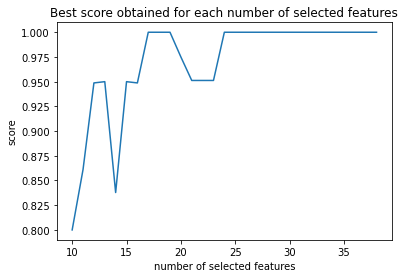

In [12]:
N = np.arange(10,39,1)
best_subset, best_score = MIR(y, D15, FamiliesClusters, compute_precision,True,N, 3, plot=True)
print(best_subset, best_score)

In [16]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D15[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

40
sensitivity, specificity, precision, NPV, FDR, FNR =  (1.0, 1.0, 1.0, 1.0, 0.0, 0.0)


# Mutual information feature selection (MIFS)


[  12   14   21   22   39   40   41   44   53   58   63   76   80   85
   86   95   96   99  101  105  111  118  129  134  143  144  145  150
  154  165  167  168  174  175  180  185  188  194  199  201  204  207
  213  218  221  223  225  236  237  243  246  257  264  268  269  288
  291  299  308  312  317  318  327  333  335  337  338  339  351  358
  359  360  366  373  381  384  390  417  420  423  427  437  443  445
  448  452  454  457  461  462  470  478  479  480  484  486  494  503
  506  518  521  531  537  540  549  557  579  580  583  597  603  615
  623  627  630  640  646  648  650  651  653  660  665  667  671  673
  675  677  681  683  689  699  706  713  717  718  725  729  737  740
  742  743  752  754  755  766  772  775  777  778  784  785  787  788
  793  797  800  805  813  817  822  830  832  843  847  849  859  869
  871  874  889  892  899  906  911  916  930  932  935  951  955  969
  973  977  979  981  982  987  990  995 1006 1017 1020 1029 1037 1051
 1058 

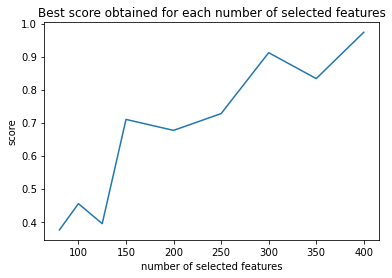

In [17]:
N = np.array([80,100,125,150,200,250,300,350,400])
best_subset, best_score = MIFS(y, D15, FamiliesClusters, compute_precision,True,N, 1, plot=True)
print(best_subset, best_score)

In [18]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D15[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

400
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8409090909090909, 0.9995794785534062, 0.9736842105263158, 0.9970637583892618, 0.02631578947368421, 0.1590909090909091)


# Joint Mutual Information (JMI)

[  78  184  286  324  355  365  399  447  476  513  516  527  529  534
  569  575  585  590  605  606  616  625  633  634  637  641  652  655
  656  657  658  659  662  672  676  682  686  687  704  705  716  723
  731  732  735  736  741  748  751  758  761  762  771  773  776  780
  781  791  796  803  807  809  811  812  814  816  826  834  842  845
  848  857  860  862  866  868  873  875  880  885  896  908  919  920
  933  934  937  941  956  959  963  964  965  966  972  975  976  980
 1000 1004 1009 1041 1048 1049 1066 1076 1077 1083 1093 1095 1102 1107
 1109 1111 1129 1140 1145 1157 1177 1178 1181 1186 1197 1206 1212 1224
 1227 1229 1230 1232 1233 1243 1248 1252 1254 1257 1267 1272 1281 1286
 1289 1290 1299 1300 1306 1309 1312 1324 1345 1355 1360 1365 1366 1379
 1391 1392 1394 1398 1400 1402 1409 1419 1423 1424 1426 1428 1439 1444
 1446 1448 1449 1456 1463 1464 1470 1480 1498 1521 1523 1524 1536 1543
 1544 1558 1567 1584 1588 1589 1590 1593 1611 1618 1630 1631 1649 1668
 1672 

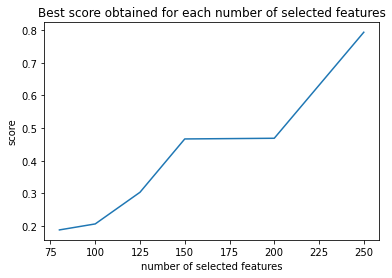

In [19]:
N = np.array([80,100,125,150,200,250])
best_subset, best_score = JMI(y, D15, FamiliesClusters, compute_precision ,True, N, plot=True)
print(best_subset, best_score)

In [20]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D15[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

250
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.6136363636363636, 0.9973703981968445, 0.7941176470588235, 0.9936377245508982, 0.20588235294117646, 0.38636363636363635)


# Double input symmetrical relevance (DISR)

[   1    3    5    6    7    8    9   10   13   24   25   26   29   32
   34   35   38   42   46   64   66   68   70   71   73   78   91  110
  113  114  115  122  128  130  131  136  156  162  163  177  196  198
  209  219  222  228  230  231  235  240  244  247  248  254  255  261
  263  265  274  278  279  280  281  282  286  292  295  298  300  301
  305  315  324  330  342  344  345  346  355  356  378  383  389  393
  395  397  398  399  400  412  413  415  416  429  439  441  447  451
  459  477  481  491  509  512  513  514  516  526  529  534  564  569
  575  585  590  605  606  616  625  633  634  637  641  652  655  656
  658  659  662  672  676  682  686  687  688  695  704  705  716  723
  731  732  735  736  741  748  751  753  758  761  762  771  773  774
  776  779  780  781  791  795  796  803  807  809  811  812  814  816
  834  842  845  848  853  857  860  862  866  868  873  875  877  880
  882  885  896  908  918  919  920  933  934  937  941  954  956  959
  963 

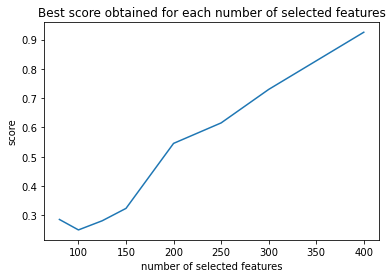

In [21]:
N = np.array([80,100,125,150,200,250,300,400])
best_subset, best_score = DISR(y, D15, FamiliesClusters, compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [22]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D15[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

400
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8409090909090909, 0.9986510791366906, 0.925, 0.9968581687612208, 0.075, 0.1590909090909091)


# Fisher's score

[   1    2    3    6    9   14   15   17   18   21   29   32   33   34
   35   36   40   42   43   47   48   49   53   55   57   62   66   68
   69   71   73   78   80   81   84   89   93   94   96   97   98   99
  100  101  102  105  108  109  112  115  116  118  126  130  131  132
  134  138  146  148  150  151  156  158  167  171  175  178  183  186
  187  188  189  192  196  199  200  201  203  208  211  214  220  221
  222  223  227  228  229  230  237  240  241  243  244  250  252  253
  255  256  261  262  264  269  270  271  272  273  274  277  278  279
  283  286  289  290  299  300  302  306  310  313  315  316  317  318
  319  320  321  328  329  330  331  333  334  336  338  341  342  347
  348  351  354  356  363  365  367  373  374  375  376  383  384  386
  388  389  390  393  396  397  400  402  405  406  407  409  411  413
  415  416  418  420  421  423  424  425  428  429  431  432  435  436
  439  445  446  447  450  453  454  456  460  464  466  469  470  471
  473 

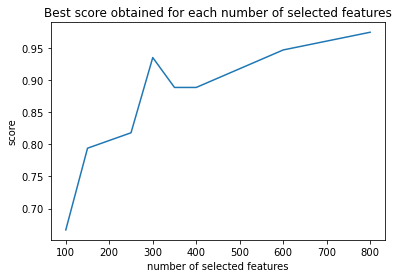

In [23]:
N = np.array([100,150,250,300,350,400,600,800])
best_subset, best_score = fishers_score(y, D15, FamiliesClusters,compute_precision,True,N, plot=True)
print(best_subset, best_score)

In [24]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D15[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

800
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8863636363636364, 0.9995503597122302, 0.975, 0.9977558348294434, 0.025, 0.11363636363636363)


# Laplacian score

[   0    3    7    9   14   15   28   30   33   34   47   53   55   57
   59   65   66   71   77   79   82   83   87   89   95   98  113  114
  116  120  122  139  147  161  163  165  167  175  185  191  212  213
  214  216  218  224  227  229  233  235  249  252  254  257  259  267
  271  273  275  280  282  286  289  290  292  303  305  308  309  312
  315  316  319  320  331  332  336  340  352  353  356  361  368  371
  383  387  397  399  401  402  404  406  407  413  414  415  428  437
  441  454  457  459  461  464  466  479  484  489  496  497  503  508
  509  510  521  524  528  534  538  539  543  550  556  565  570  572
  573  578  594  607  619  620  621  624  625  626  628  633  636  637
  644  650  654  668  673  677  678  683  689  698  699  702  710  714
  721  724  728  730  740  750  764  768  769  771  772  776  778  784
  786  791  796  797  798  800  808  815  816  818  821  822  837  840
  842  855  859  867  869  870  872  883  886  892  899  907  914  926
  927 

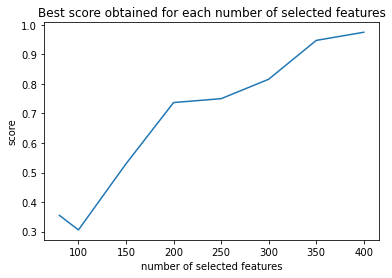

In [25]:
N = np.array([80,100,150,200,250,300,350,400])
best_subset, best_score = laplacian_score(y, D15, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [26]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D15[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

400
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8863636363636364, 0.9995503597122302, 0.975, 0.9977558348294434, 0.025, 0.11363636363636363)


# ReliefF algorithm

[   0    8   11   20   23   30   31   34   37   49   52   63   67   70
   72   77   87   97   98  106  108  115  120  127  132  133  137  143
  156  164  172  184  185  192  196  206  212  217  219  239  253  257
  260  261  264  269  270  271  272  275  277  280  297  301  303  312
  313  317  318  319  320  327  347  375  404  405  407  412  413  415
  416  419  436  462  466  480  482  494  505  506  513  520  537  541
  547  548  550  559  560  564  570  571  577  580  581  582  583  587
  590  594  601  604  606  609  610  612  619  620  621  622  624  626
  627  629  633  636  641  643  650  652  656  657  661  670  677  679
  683  684  687  688  689  690  692  694  698  700  701  703  704  707
  710  712  713  724  726  728  729  741  749  752  753  756  757  761
  767  773  776  780  781  784  785  790  797  803  809  815  816  820
  823  825  827  828  833  839  844  856  864  869  870  882  888  896
  897  898  908  915  916  922  923  926  931  932  938  947  959  960
  970 

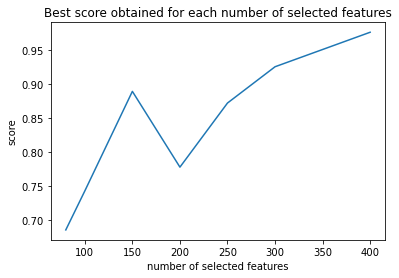

In [27]:
N = np.array([80,100,150,200,250,300,400])
best_subset, best_score = reliefF(y, D15, FamiliesClusters,compute_precision,True, N, 5, plot=True)
print(best_subset, best_score)

In [28]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D15[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

400
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9090909090909091, 0.9995335820895522, 0.975609756097561, 0.9981369352585002, 0.024390243902439025, 0.09090909090909091)


# Fast Correlation Based Filter algorithm (FCBF)

[   0    6   13   14   25   28   30   36   41   57   61   63   66   70
   77   80   85   95   98  109  113  119  124  127  135  139  140  141
  142  147  157  159  161  164  165  173  178  179  181  184  193  195
  196  199  209  219  221  230  241  243  244  246  254  265  277  285
  294  297  307  316  319  320  321  324  325  332  340  342  347  349
  357  362  369  370  383  386  394  403  417  421  447  453  462  464
  465  468  478  480  494  505  514  518  521  522  535  538  545  547
  556  563  567  570  573  574  575  583  590  591  595  597  599  602
  610  614  620  624  627  628  630  635  647  650  652  658  659  666
  682  683  684  688  694  695  703  707  709  710  713  724  727  729
  745  747  752  755  758  776  778  793  798  799  804  821  822  832
  833  836  840  841  844  853  856  857  863  865  868  874  877  881
  882  888  897  901  904  907  915  916  918  931  933  934  936  937
  950  953  955  958  962  967  970  974  975  980  982  986 1000 1011
 1012 

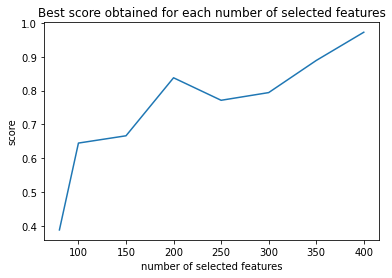

In [29]:
N = np.array([80,100,150,200,250,300,350,400])
best_subset, best_score = FCBF(y, D15, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [30]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D15[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

400
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.7954545454545454, 0.9996038034865293, 0.9722222222222222, 0.9964454976303317, 0.027777777777777776, 0.20454545454545456)


# Hilbert Schmidt Independence Criterion Lasso (HSIC Lasso)

Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/Users/theomaffei/opt/anaconda3/lib/python3.8/site-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 88. Number of blocks 4.4 will be approximated to 4.
  warnings.warn(msg, RuntimeWarning)


Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/Users/theomaffei/opt/anaconda3/lib/python3.8/site-packages/pyHSICLasso/nlars.py:77: RuntimeWarning: divide by zero encountered in true_divide
  gamma1 = (C - c[I]) / (XtXw[A[0]] - XtXw[I])


Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
[  20   28   38   52   65   98   99  103  145  157  182  192  198  207
  222  226  235  286  287  292  301  310  320  327  347  349  356  357
  367  372  393  406  445  451  464  478  496  504  594  614  623  624
  643  671  676  715  717  720  726  741  745  748  750  778  780  786
  787  791  802  827  856  870  875  887  897  914  920  925  934  937
  946  986 1025 1030 1034 1052 1054 1088 1095 1115 1123 1127 1142 1170
 1203 1224 1237 1262 1268 1282 1325 1348 1391 1397 1401 1406 1414 1431
 1454 1455 1456 1459 1462 1463 1467 1469 1481 1497 1512 1537 1543 1562
 1568 1582 1588 1591 1624 1625 1633 1644 1675 1703 1712 1747 1765 1777
 1779 1798 1800 1801 1803 1826 1827 1

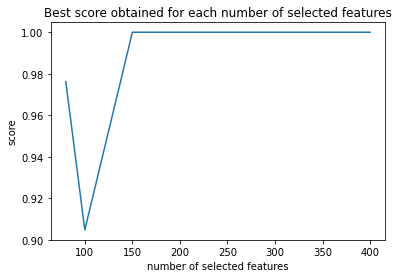

In [31]:
N = np.array([80,100,150,200,250,300,350,400])
best_subset, best_score = HsicLasso(y, D15, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [32]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D15[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

150
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9545454545454546, 1.0, 1.0, 0.999031007751938, 0.0, 0.045454545454545456)


# Wrapper methods

# Stochastic optimization of features selection 

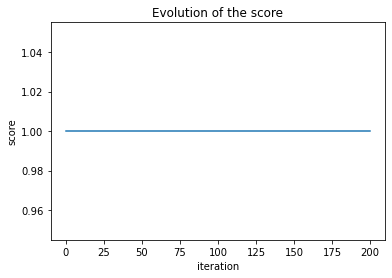

1.0


In [15]:
best_subset, best_score  = hillclimbing(y, D15, FamiliesClusters, compute_precision,True, 200, 0.1, True)
print(best_score)

In [7]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D15[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

1026
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8863636363636364, 1.0, 1.0, 0.9978326831382748, 0.0, 0.11363636363636363)


# Stimulated annealing

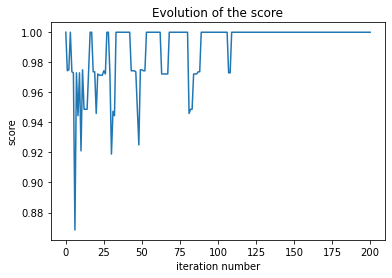

1.0


In [9]:
best_subset, best_score  = stimulated_annealing(y, D15, FamiliesClusters, compute_precision,True, 200, 0.1, 1, True)
print(best_score)

In [10]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D15[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

1036
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8863636363636364, 1.0, 1.0, 0.9978326831382748, 0.0, 0.11363636363636363)


# Forward feature selection

In [3]:
N = np.array([80,100,150,200,250,300])
best_subset, best_score  = forward_feature_selection(y,D15, FamiliesClusters, compute_precision, True, N, True)
print(best_score)

KeyboardInterrupt: 

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D15[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Backward feature selection

In [ ]:
N = np.array([80,100,150,200,250,300])
best_subset, best_score  = backward_feature_selection(y,D15, FamiliesClusters, compute_precision, True, N, True)
print(best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D15[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Genetic feature selection algorithm

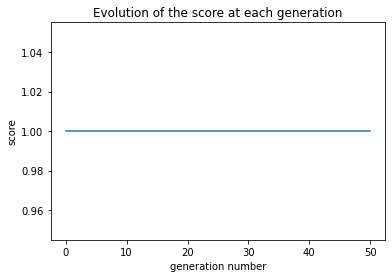

1.0


In [11]:
best_subset, best_score  = genetic_fs(y,D15,FamiliesClusters, compute_precision,True, 300, 0.5, 0.2, 50, 3, True)
print(best_score)

In [12]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D15[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

670
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8409090909090909, 1.0, 1.0, 0.9971533143554291, 0.0, 0.1590909090909091)


# Hybrid methods

# Mutual information and stimulated annealing

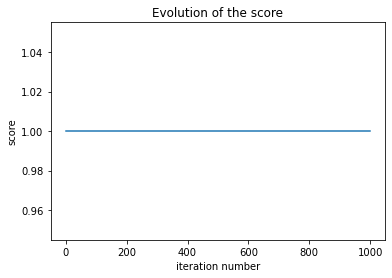

[   7   20   26   38   54   96  102  114  131  142  145  176  182  192
  201  202  212  214  229  241  245  246  251  252  254  271  273  286
  289  292  314  318  321  323  327  364  372  383  407  414  419  421
  441  444  446  458  552  562  573  574  588  592  593  609  623  643
  644  653  659  665  670  676  677  723  725  726  734  746  765  775
  780  796  802  807  828  854  855  856  857  860  875  880  882  883
  890  912  914  915  918  919  923  941  956  965  966  986  991  993
  996 1023 1035 1041 1050 1057 1059 1061 1064 1067 1068 1070 1075 1079
 1087 1088 1089 1105 1112 1113 1114 1130 1133 1147 1151 1170 1181 1183
 1194 1198 1207 1209 1211 1220 1236 1237 1243 1252 1271 1273 1281 1296
 1300 1301 1316 1332 1346 1349 1357 1360 1361 1376 1380 1412 1414 1415
 1416 1426 1450 1453 1454 1455 1457 1459 1463 1467 1479 1515 1519 1533
 1542 1594 1610 1623 1625 1626 1632 1635 1639 1644 1649 1655 1678 1687
 1688 1690 1702 1717 1721 1726 1728 1733 1740 1753 1754 1759 1765 1768
 1769 

In [5]:
D15_best_subset, best_score = MI_stimulated_annealing(y,D15, FamiliesClusters, compute_precision,True, np.array([400]), 3, 1000, 0.05, 1, True)
print(best_subset, D15_best_subset)

In [7]:
print(len(D15_best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D15[:, D15_best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

198
sensitivity, specificity, precision, NPV, FDR, FNR =  (1.0, 1.0, 1.0, 1.0, 0.0, 0.0)


# Mutual information and genetic feature selection

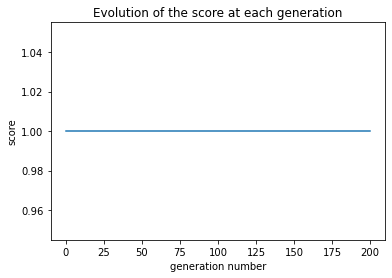

[   3    7   27   30   44   49   94  133  145  158  172  192  201  216
  246  271  292  320  323  333  397  407  412  429  453  455  480  487
  505  522  539  550  571  588  589  604  607  609  653  696  705  709
  727  751  752  755  799  807  830  848  854  859  882  890  907  908
  918  930  935  937  951 1006 1034 1041 1059 1060 1064 1069 1087 1119
 1123 1125 1130 1133 1155 1185 1197 1220 1257 1280 1285 1290 1328 1332
 1363 1401 1414 1416 1427 1431 1454 1475 1520 1531 1544 1549 1561 1562
 1587 1593 1594 1606 1610 1619 1621 1626 1628 1639 1642 1651 1674 1676
 1687 1721 1734 1752 1764 1765 1768 1777 1792 1795 1800 1806 1856 1862
 1869 1874 1876 1902 1907 1909 1922 1926 1942 1947 2015 2021] 1.0


In [8]:
best_subset, best_score = MI_genetic_fs(y,D15, FamiliesClusters, compute_sensitivity,True, np.array([850]), 3,  300, 0.5, 0.2, 200, 3, True)
print(best_subset, best_score)

In [9]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D15[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

138
sensitivity, specificity, precision, NPV, FDR, FNR =  (1.0, 1.0, 1.0, 1.0, 0.0, 0.0)


In [7]:
D15_best = get_best_genes_names(D15_best_subset, '../data/processed_data/D15genes_interest.csv' ,'../data/optimized_subsets/D15genes_best.csv')